In [26]:
# Exercise 5
from pathlib import Path
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
# import functions from utils here, if necessary

In [19]:
#from utils import 
input_dir = Path("data")
output_dir = Path("solution")

# 1. Go to http://surfobs.climate.copernicus.eu/dataaccess/access_eobs.php#datafiles
#    and download the 0.25 deg. file for daily mean temperature.
#    Save the file into the data directory but don't commit it to github!!! [2P]

In [23]:
# 2. Read the file using xarray. Get to know your data. What's in the file?
#    Calculate monthly means for the reference periode 1981-2010 for Europe (Extent: Lon_min:-13, Lon_max: 25, Lat_min: 30, Lat_max: 72). [2P]

# first we open the file using the "open_dataset" method:
ds = xr.open_dataset(input_dir / "tg_ens_mean_0.25deg_reg_v19.0e.nc")

# then we slice, group and average the temperature data:
monthly_means_ref_time_period = ds\
    .sel(dict(time      = slice("1981-01-01", "2010-12-31"),
              latitude  = slice(30,72),
              longitude = slice(-13,25)))\
    .groupby("time.month")\
    .mean("time")

/home/sebastian/miniconda3/envs/python_kurs/lib/python3.7/site-packages/xarray/core/nanops.py:161: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


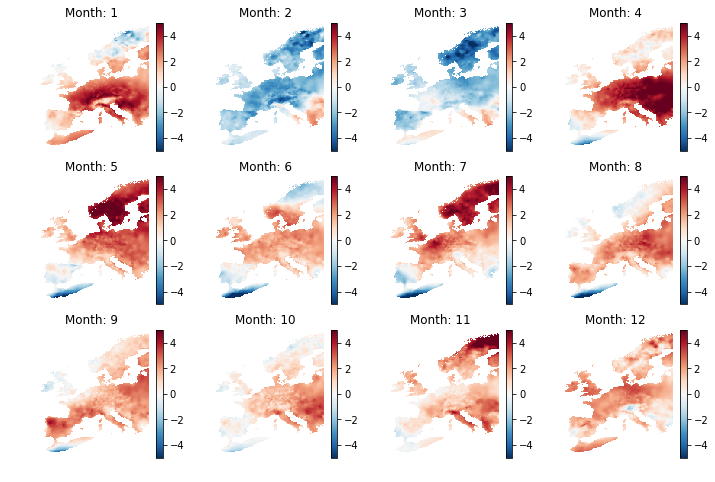

In [66]:
# 3. Calculate monthly anomalies from the reference period for the year 2018 (use the same extent as in #2).
#    Make a quick plot of the anomalies for the region. [2P]

# Again, we slice, group and average the data. 
# After that we just subtract the means of the reference period that we calculated before.
monthly_anomalies_2018 = ds\
    .sel(dict(time = "2018",
              latitude  = slice(30,72),
              longitude = slice(-13,25)))\
    .groupby("time.month")\
    .mean("time")\
    - monthly_means_ref_time_period

# Now we plot all 12 months in a (3/4) grid using a diverging colormap (Red-Blue)
fig, subplots = plt.subplots(3,4,figsize=(12,8))

for i, subplot in enumerate(subplots.flatten()):
    im = subplot.imshow(monthly_anomalies_2018.tg[i][::-1],vmin=-5,vmax=5,cmap="RdBu_r")
    subplot.set_title("Month: {}".format(i+1))
    subplot.axis("off")
    fig.colorbar(im, ax=subplot)

In [85]:
# 4. Calculate the mean anomaly for the year 2018 for Europe (over all pixels of the extent from #2) 
#    Compare this overall mean anomaly to the anomaly of the pixel which contains Marburg. 
#    Is the anomaly of Marburg lower or higher than the one for Europe? [2P] 

# First, we calculate average temperature values of the reference time period
overall_mean_ref_time_period = ds\
    .sel(dict(time      = slice("1981-01-01", "2010-12-31"),
              latitude  = slice(30,72),
              longitude = slice(-13,25)))\
    .mean("time")

# Then we calculate the mean anomaly for 2018
mean_anomaly_2018 = ds.sel(dict(time = "2018",
              latitude  = slice(30,72),
              longitude = slice(-13,25))).tg.mean("time") - overall_mean_ref_time_period

# Then we calculate the overall average over all pixels
overall_anomaly_2018 = mean_anomaly_2018.tg.mean().values

# Then we calculate the anomaly value of Marburg
marburg_anomaly_2018 = mean_anomaly_2018.sel(longitude=8.766166, latitude=50.802082, method="nearest").tg.values

print(overall_anomaly)
print(marburg_anomaly_2018)

# --> The anomaly in Marburg is higher 

1.1592995
1.5887737


In [97]:
# 5. Write the monthly anomalies from task 3 to a netcdf file with name "europe_anom_2018.nc" to the solution directory.
#    Write the monthly anomalies for Marburg to a csv file with name "marburg_anom_2018.csv" to the solution directory. [2P]

monthly_anomalies_2018.to_netcdf(output_dir / "europe_anom_2018.nc")

marburg_monthly_anomalies = pd.Series(monthly_anomalies_2018.sel(longitude=8.766166, latitude=50.802082, method="nearest").tg.values)
marburg_monthly_anomalies.to_csv(output_dir / "marburg_anom_2018.csv",header=True)